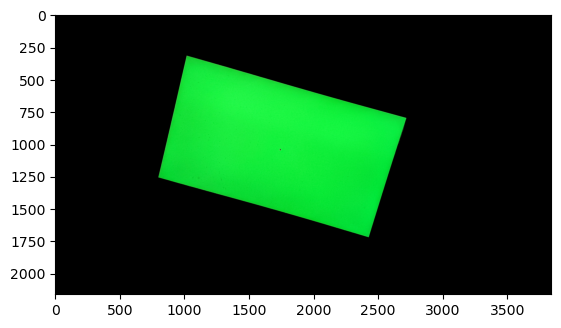

True

In [13]:
import cv2
from statistics import mean
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('GreenScreen.jpg')

# Convert image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define range of green color
lower_green = np.array([35, 60, 60])
upper_green = np.array([80, 255, 255])

# Create a mask with the green color range
mask_green = cv2.inRange(hsv, lower_green, upper_green)

# Find contours and draw a rectangle bounding box
cnts = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
rect_areas = []
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    rect_areas.append(w * h)
avg_area = mean(rect_areas)

#removing blobs with area less than half of the average areas.
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cnt_area = w * h
    if cnt_area < 0.5 * avg_area:
        mask_green[y:y + h, x:x + w] = 0
# Apply the mask to the original image
result8 = cv2.bitwise_and(img, img, mask=mask_green)
#display the image
plt.imshow(result8)
plt.show()

# Save the resulting image in the folder
cv2.imwrite("result8_image.jpg", result8)